# Capstone Project - Car accident severity (Week 2)

## Table of Contents
* [1. Description of Problem](#DescriptionProblem)
* [2. Description of Data](#DescriptionData)
* [3. Methodology](#Methodology)
* [4. Results](#Results)
* [5. Observations](#Observations)
* [6. Conclusion](#Conclusion)


## 1. Description of the problem <a class="anchor" id="DescriptionProblem"></a>

We have the data of all collisions provided by SPD and recorded by Traffic Records, in the period from 2004 to 2020.

Based on an amount of parameters of the situation, we want to predict the <b>severity code</b> of the collision. For this purpose, we are going to use a <i>supervised machine learning algorithm</i>.

The aim of this analysis is to know the most typical conditions in which there is a collision and be able to reduce them in future 

## 2. Description of the data <a class="anchor" id="DescriptionData"></a>

The database for this situation comes from this csv file 'https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv'

The database provided has one target, the severity code (SEVERITYCODE). It corresponds to the severity of the collision in the following way:
<ul>
    <li>3—fatality</li>
    <li>2b—serious injury</li>
    <li>2—injury</li>
    <li>1—property damage</li>
    <li>0—unknown</li>
</ul>

The database has 37 attributes. Below is shown the type of each attribute.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
df = pd.read_csv('https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv', index_col=3, low_memory=False)
df.head()

,SEVERITYCODE,X,Y,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
OBJECTID,,,,,,,,,,,,,,,,,,,,,
1,2,-122.323148,47.703140,1307,1307,3502005,Matched,Intersection,37475.0,5TH AVE NE AND NE 103RD ST,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
2,1,-122.347294,47.647172,52200,52200,2607959,Matched,Block,NaN,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
3,1,-122.334540,47.607871,26700,26700,1482393,Matched,Block,NaN,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
4,1,-122.334803,47.604803,1144,1144,3503937,Matched,Block,NaN,2ND AVE BETWEEN MARION ST AND MADISON ST,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
5,2,-122.306426,47.545739,17700,17700,1807429,Matched,Intersection,34387.0,SWIFT AVE S AND SWIFT AV OFF RP,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [8]:
df.dtypes

SEVERITYCODE        int64
X                 float64
Y                 float64
INCKEY              int64
COLDETKEY           int64
REPORTNO           object
STATUS             object
ADDRTYPE           object
INTKEY            float64
LOCATION           object
EXCEPTRSNCODE      object
EXCEPTRSNDESC      object
SEVERITYCODE.1      int64
SEVERITYDESC       object
COLLISIONTYPE      object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INCDATE            object
INCDTTM            object
JUNCTIONTYPE       object
SDOT_COLCODE        int64
SDOT_COLDESC       object
INATTENTIONIND     object
UNDERINFL          object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
PEDROWNOTGRNT      object
SDOTCOLNUM        float64
SPEEDING           object
ST_COLCODE         object
ST_COLDESC         object
SEGLANEKEY          int64
CROSSWALKKEY        int64
HITPARKEDCAR       object
dtype: object

In [9]:
df.describe()

,SEVERITYCODE,X,Y,INCKEY,COLDETKEY,INTKEY,SEVERITYCODE.1,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,SDOTCOLNUM,SEGLANEKEY,CROSSWALKKEY
count,194673.000000,189339.000000,189339.000000,194673.000000,194673.000000,65070.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,1.149360e+05,194673.000000,1.946730e+05
mean,1.298901,-122.330518,47.619543,141091.456350,141298.811381,37558.450576,1.298901,2.444427,0.037139,0.028391,1.920780,13.867768,7.972521e+06,269.401114,9.782452e+03
std,0.457778,0.029976,0.056157,86634.402737,86986.542110,51745.990273,0.457778,1.345929,0.198150,0.167413,0.631047,6.868755,2.553533e+06,3315.776055,7.226926e+04
min,1.000000,-122.419091,47.495573,1001.000000,1001.000000,23807.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.007024e+06,0.000000,0.000000e+00
25%,1.000000,-122.348673,47.575956,70383.000000,70383.000000,28667.000000,1.000000,2.000000,0.000000,0.000000,2.000000,11.000000,6.040015e+06,0.000000,0.000000e+00
50%,1.000000,-122.330224,47.615369,123363.000000,123363.000000,29973.000000,1.000000,2.000000,0.000000,0.000000,2.000000,13.000000,8.023022e+06,0.000000,0.000000e+00
75%,2.000000,-122.311937,47.663664,203319.000000,203459.000000,33973.000000,2.000000,3.000000,0.000000,0.000000,2.000000,14.000000,1.015501e+07,0.000000,0.000000e+00
max,2.000000,-122.238949,47.734142,331454.000000,332954.000000,757580.000000,2.000000,81.000000,6.000000,2.000000,12.000000,69.000000,1.307202e+07,525241.000000,5.239700e+06


In [10]:
df.describe(include=['object'])

,REPORTNO,STATUS,ADDRTYPE,LOCATION,EXCEPTRSNCODE,EXCEPTRSNDESC,SEVERITYDESC,COLLISIONTYPE,INCDATE,INCDTTM,...,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,ST_COLCODE,ST_COLDESC,HITPARKEDCAR
count,194673,194673,192747,191996,84811,5638,194673,189769,194673,194673,...,29805,189789,189592,189661,189503,4667,9333,194655,189769,194673
unique,194670,2,3,24102,2,1,2,10,5985,162058,...,1,4,11,9,9,1,1,63,62,2
top,1782439,Matched,Block,BATTERY ST TUNNEL NB BETWEEN ALASKAN WY VI NB ...,,"Not Enough Information, or Insufficient Locati...",Property Damage Only Collision,Parked Car,2006/11/02 00:00:00+00,11/2/2006,...,Y,N,Clear,Dry,Daylight,Y,Y,32,One parked--one moving,N
freq,2,189786,126926,276,79173,5638,136485,47987,96,96,...,29805,100274,111135,124510,116137,4667,9333,44421,44421,187457


## 3. Methodology <a class="anchor" id="Methodology"></a>

### 3.1. Visualization of Data

The target feature, Severity Code, has only 2 values out of the 5 possible codes. Below is shown the percentage of each value: 

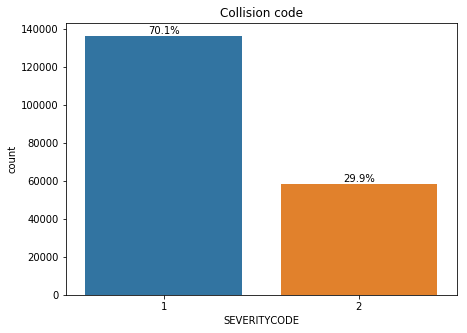

In [11]:
plt.figure(figsize=(7,5))

ax = sns.countplot(x="SEVERITYCODE", data=df)
ax.set_title('Collision code')

total = len(df['SEVERITYCODE'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2 - 0.08
    y = p.get_y() + p.get_height() + 1200
    ax.annotate(percentage, (x, y))

plt.show()

Respecting the other features, I consider that the most important ones are the following ones:
<ul>
    <li>ADDRTYPE - Collision Address Type</li>
    <li>COLLISIONTYPE - Collision Type</li>
    <li>PERSONCOUNT - Number of people involved in the collision</li>
    <li>PEDCOUNT - Number of pedestrians involved in the collision</li>
    <li>PEDCYLCOUNT - Number of bicycles involved in the collision</li>
    <li>VEHCOUNT - Number of vehicles involved in the collision</li>
    <li>INATTENTIONIND - Collision due to inattention or not</li>
    <li>UNDERINFL - Driver involved under the influence of drugs or alcohol</li>
    <li>WEATHER - Weather conditions in the collision</li>
    <li>SPEEDING - Speeding as a factor in the collision</li>
    <li>ROADCOND - Condition of the road during the collision</li>
    <li>LIGHTCOND - Light conditions during the collision</li>
    <li>PEDROWNOTGRNT - The pedestrian right of way was not granted</li>
    <li>HITPARKEDCAR - Collision involved hitting a parked car</li>
</ul>

Below is shown the percentage of each feature depending on the severity code. They are grouped by two in order to make the report shorter and easier to look and understand.

#### - Collision Addres Type and Collision Type

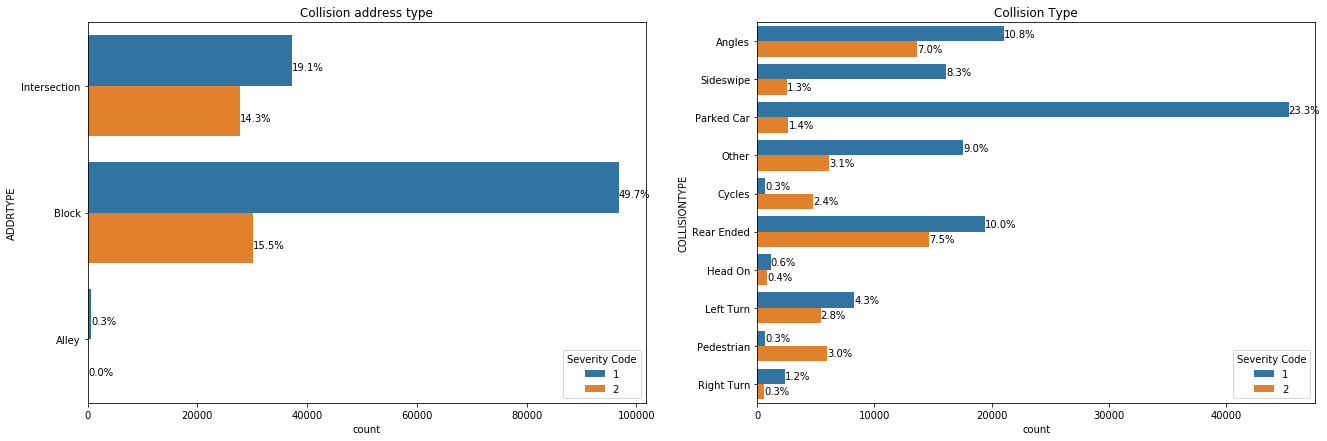

In [12]:
fig = plt.figure(figsize=(22,7))

ax1 = fig.add_subplot(1, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax2 = fig.add_subplot(1, 2, 2) # add subplot 2 (1 row, 2 columns, second plot)

sns.countplot(y="ADDRTYPE", hue="SEVERITYCODE", data=df, ax=ax1)
ax1.set_title('Collision address type')
ax1.legend(loc='lower right', title='Severity Code')


total = len(df['ADDRTYPE'])
for p in ax1.patches:
    percentage = '{:.1f}%'.format(100 * p.get_width()/total)
    x = p.get_x() + p.get_width()
    y = p.get_y() + p.get_height()/2 + 0.08
    ax1.annotate(percentage, (x, y))
        
        
sns.countplot(y="COLLISIONTYPE", hue="SEVERITYCODE", data=df, ax=ax2)
ax2.set_title('Collision Type')
ax2.legend(loc='lower right', title='Severity Code')

total = len(df['COLLISIONTYPE'])
for p in ax2.patches:
    percentage = '{:.1f}%'.format(100 * p.get_width()/total)
    x = p.get_x() + p.get_width() 
    y = p.get_y() + p.get_height()/2 + 0.08
    ax2.annotate(percentage, (x, y))
        
plt.show()

#### - Number of people involved in the collision and Number of pedestrian involved in the collision

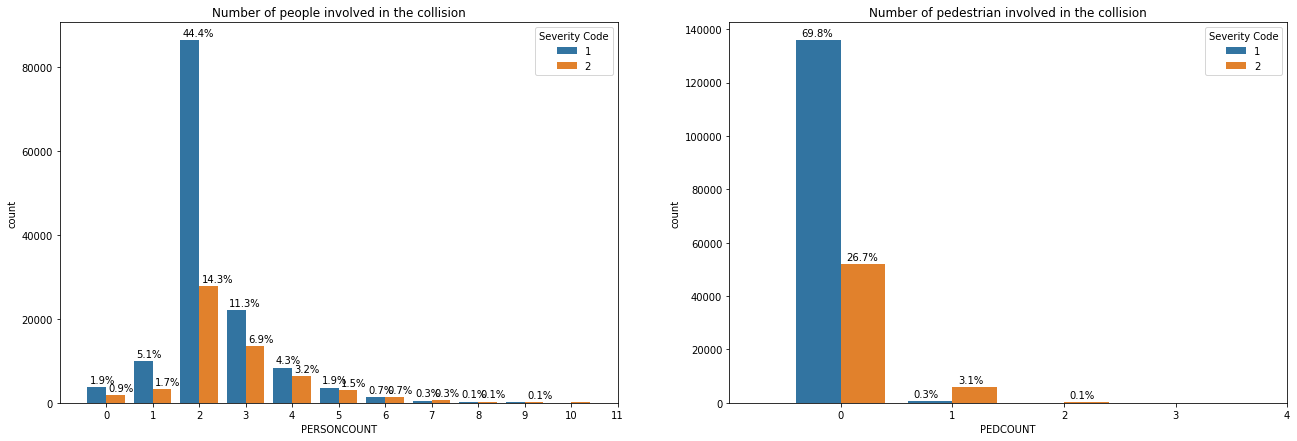

In [13]:
fig = plt.figure(figsize=(22,7))

ax1 = fig.add_subplot(1, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax2 = fig.add_subplot(1, 2, 2) # add subplot 2 (1 row, 2 columns, second plot)


ax1 = sns.countplot(x="PERSONCOUNT", hue="SEVERITYCODE", data=df, ax=ax1)
ax1.set_title('Number of people involved in the collision')
ax1.set_xlim(-1, 11)
ax1.legend(loc='upper right', title='Severity Code')

total = len(df['PERSONCOUNT'])
for p in ax1.patches:
    if np.isnan(p.get_height()) == False:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        if percentage > "0.1":
            x = p.get_x() + p.get_width()/2 - 0.15
            y = p.get_y() + p.get_height() + 1000
            ax1.annotate(percentage, (x, y))
            

ax2 = sns.countplot(x="PEDCOUNT", hue="SEVERITYCODE", data=df, ax=ax2)
ax2.set_title('Number of pedestrian involved in the collision')
ax2.set_xlim(-1, 4)
ax2.legend(loc='upper right', title='Severity Code')

total = len(df['PEDCOUNT'])
for p in ax2.patches:
    if np.isnan(p.get_height()) == False:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        if percentage > "0.1":
            x = p.get_x() + p.get_width()/2 - 0.15
            y = p.get_y() + p.get_height() + 1500
            ax2.annotate(percentage, (x, y))

plt.show()

#### - Number of bicycles involved in the collision and Number of vehicles involved in the collision

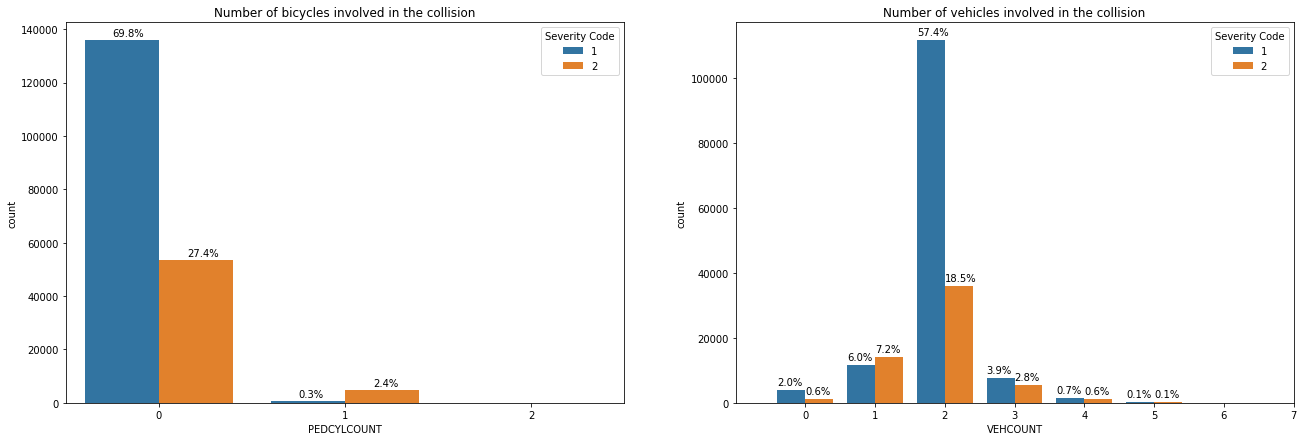

In [14]:
fig = plt.figure(figsize=(22,7))

ax1 = fig.add_subplot(1, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax2 = fig.add_subplot(1, 2, 2) # add subplot 2 (1 row, 2 columns, second plot)

ax1 = sns.countplot(x="PEDCYLCOUNT", hue="SEVERITYCODE", data=df, ax=ax1)
ax1.set_title('Number of bicycles involved in the collision')
ax1.legend(loc='upper right', title='Severity Code')

total = len(df['PEDCYLCOUNT'])
for p in ax1.patches:
    if np.isnan(p.get_height()) == False:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        if percentage > "0.1":
            x = p.get_x() + p.get_width()/2 - 0.05
            y = p.get_y() + p.get_height() + 1500
            ax1.annotate(percentage, (x, y))
            


ax2 = sns.countplot(x="VEHCOUNT", hue="SEVERITYCODE", data=df, ax=ax2)
ax2.set_title('Number of vehicles involved in the collision')
ax2.set_xlim(-1,7)
ax2.legend(loc='upper right', title='Severity Code')

total = len(df['VEHCOUNT'])

for p in ax2.patches:
    if np.isnan(p.get_height()) == False:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        if percentage > "0.1":
            x = p.get_x() + p.get_width()/2 - 0.2
            y = p.get_y() + p.get_height() + 1500
            ax2.annotate(percentage, (x, y))

plt.show()

#### - Collision due to inattention or under the influence of drugs or alcohol

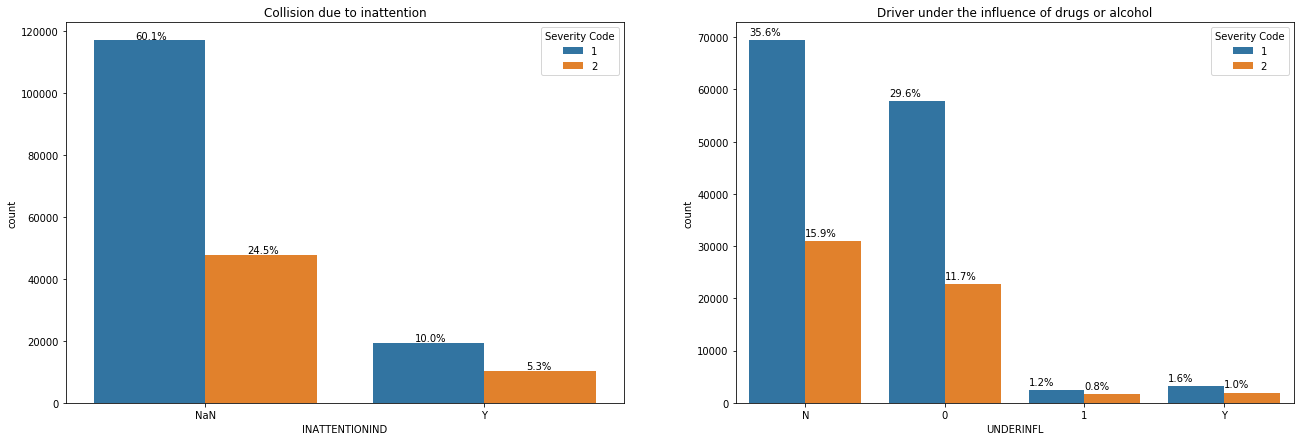

In [15]:
df["INATTENTIONIND"] = df['INATTENTIONIND'].fillna('NaN')

fig = plt.figure(figsize=(22,7))

ax1 = fig.add_subplot(1, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax2 = fig.add_subplot(1, 2, 2) # add subplot 2 (1 row, 2 columns, second plot)

ax1 = sns.countplot(x="INATTENTIONIND", hue="SEVERITYCODE", data=df, ax=ax1)
ax1.set_title('Collision due to inattention')
ax1.legend(loc='upper right', title='Severity Code')

total = len(df['INATTENTIONIND'])
for p in ax1.patches:
    #if np.isnan(p.get_height()) == False:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        if percentage > "0.1":
            x = p.get_x() + p.get_width()/2 - 0.05
            y = p.get_y() + p.get_height() + 500
            ax1.annotate(percentage, (x, y))
            


ax2 = sns.countplot(x="UNDERINFL", hue="SEVERITYCODE", data=df, ax=ax2)
ax2.set_title('Driver under the influence of drugs or alcohol')
ax2.legend(loc='upper right', title='Severity Code')

total = len(df['UNDERINFL'])

for p in ax2.patches:
    if np.isnan(p.get_height()) == False:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        if percentage > "0.1":
            x = p.get_x() + p.get_width()/2 - 0.2
            y = p.get_y() + p.get_height() + 1000
            ax2.annotate(percentage, (x, y))

plt.show()

#### - Weather collision during the collision and Speeding as a factor of collision

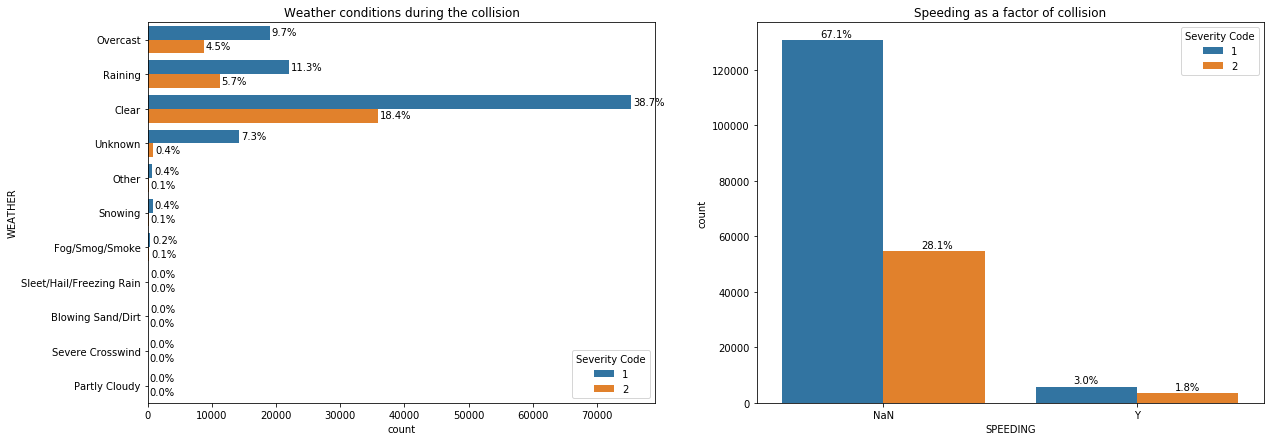

In [16]:
df["SPEEDING"] = df['SPEEDING'].fillna('NaN')

fig = plt.figure(figsize=(20,7))

ax1 = fig.add_subplot(1, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax2 = fig.add_subplot(1, 2, 2) # add subplot 2 (1 row, 2 columns, second plot)

sns.countplot(y="WEATHER", hue="SEVERITYCODE", data=df, ax=ax1)
ax1.set_title('Weather conditions during the collision')
ax1.legend(loc='lower right', title='Severity Code')

total = len(df['WEATHER'])
for p in ax1.patches:
    percentage = '{:.1f}%'.format(100 * p.get_width()/total)
    x = p.get_x() + p.get_width() + 300 
    y = p.get_y() + p.get_height()/2 + 0.08
    ax1.annotate(percentage, (x, y))
            
        
ax2 = sns.countplot(x="SPEEDING", hue="SEVERITYCODE", data=df, ax=ax2)
ax2.set_title('Speeding as a factor of collision')
ax2.legend(loc='upper right', title='Severity Code')

total = len(df['SPEEDING'])

for p in ax2.patches:
    if np.isnan(p.get_height()) == False:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        if percentage > "0.1":
            x = p.get_x() + p.get_width()/2 - 0.05
            y = p.get_y() + p.get_height() + 1200
            ax2.annotate(percentage, (x, y))

plt.show()

#### - Condition of the road during the collision and Light conditions during the collision

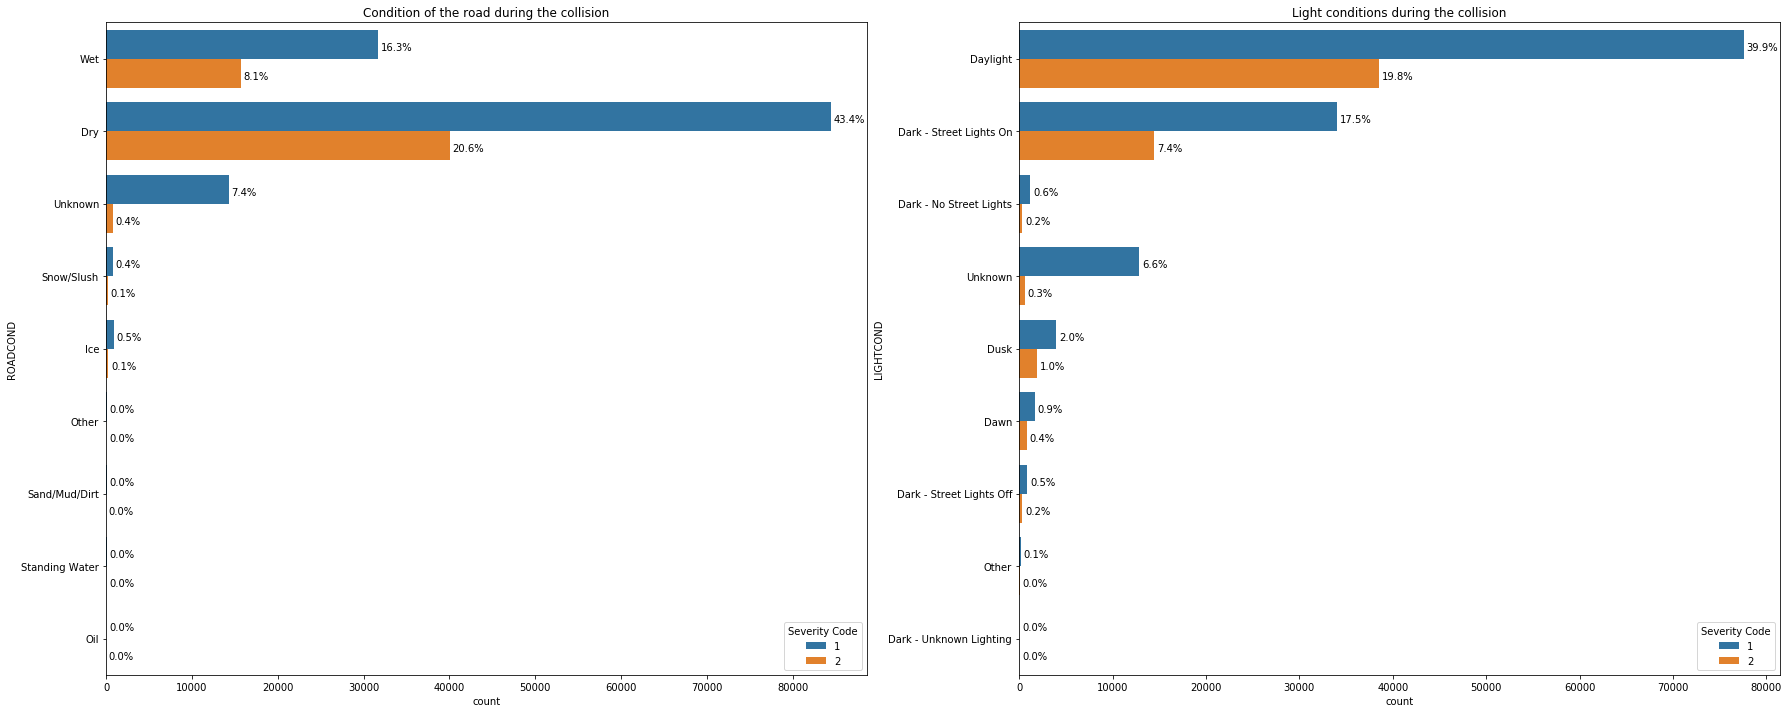

In [17]:
fig = plt.figure(figsize=(30,12))

ax1 = fig.add_subplot(1, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax2 = fig.add_subplot(1, 2, 2) # add subplot 2 (1 row, 2 columns, second plot)

sns.countplot(y="ROADCOND", hue="SEVERITYCODE", data=df, ax=ax1)
ax1.set_title('Condition of the road during the collision')
ax1.legend(loc='lower right', title='Severity Code')

total = len(df['ROADCOND'])
for p in ax1.patches:
    percentage = '{:.1f}%'.format(100 * p.get_width()/total)
    x = p.get_x() + p.get_width() + 300 
    y = p.get_y() + p.get_height()/2 + 0.08
    ax1.annotate(percentage, (x, y))
            


ax2 = sns.countplot(y="LIGHTCOND", hue="SEVERITYCODE", data=df, ax=ax2)
ax2.set_title('Light conditions during the collision')
ax2.legend(loc='lower right', title='Severity Code')

total = len(df['LIGHTCOND'])

for p in ax2.patches:
    percentage = '{:.1f}%'.format(100 * p.get_width()/total)
    x = p.get_x() + p.get_width() + 300
    y = p.get_y() + p.get_height()/2 + 0.08
    ax2.annotate(percentage, (x, y))

plt.show()

#### - The pedestrian right of way was not granted and Collision involved hitting a parked car

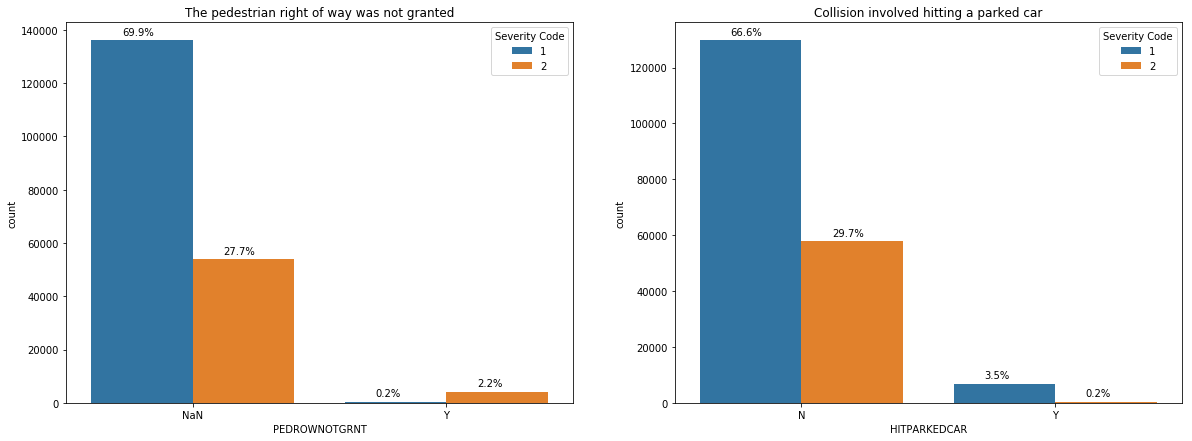

In [18]:
df["PEDROWNOTGRNT"] = df['PEDROWNOTGRNT'].fillna('NaN')

fig = plt.figure(figsize=(20,7))

ax1 = fig.add_subplot(1, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax2 = fig.add_subplot(1, 2, 2) # add subplot 2 (1 row, 2 columns, second plot)

sns.countplot(x="PEDROWNOTGRNT", hue="SEVERITYCODE", data=df, ax=ax1)
ax1.set_title('The pedestrian right of way was not granted')
ax1.legend(loc='upper right', title='Severity Code')

total = len(df['PEDROWNOTGRNT'])
for p in ax1.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2 - 0.08 
    y = p.get_y() + p.get_height() + 2000
    ax1.annotate(percentage, (x, y))
            


ax2 = sns.countplot(x="HITPARKEDCAR", hue="SEVERITYCODE", data=df, ax=ax2)
ax2.set_title('Collision involved hitting a parked car')
ax2.legend(loc='upper right', title='Severity Code')

total = len(df['HITPARKEDCAR'])

for p in ax2.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2 - 0.08
    y = p.get_y() + p.get_height() + 2000
    ax2.annotate(percentage, (x, y))

plt.show()

### 3.2. Visualizing data comparing related features

#### - Collision Type and Addres Type

<Figure size 1440x504 with 0 Axes>

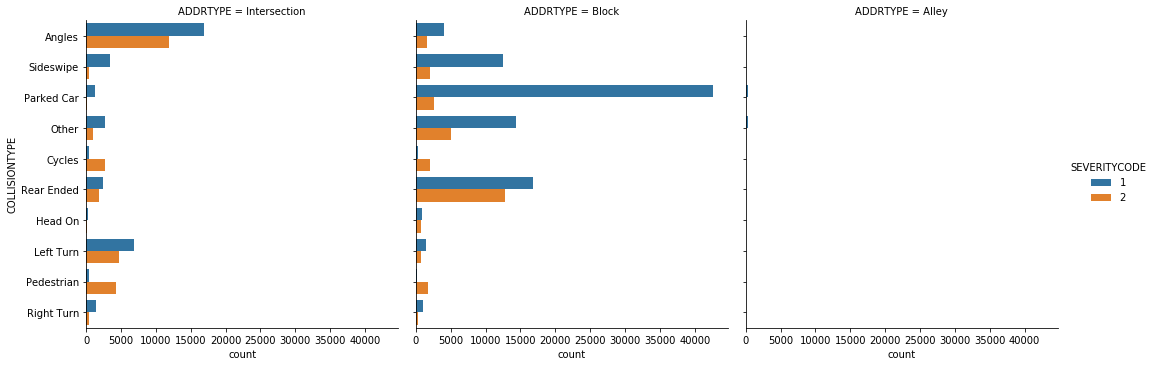

In [19]:
plt.figure(figsize=(20,7))

sns.catplot(y="COLLISIONTYPE", hue="SEVERITYCODE", col="ADDRTYPE", data=df, kind="count")
            
plt.show()

## 4. Results <a class="anchor" id="Results"></a>

In order to show the results of the analyzed data, each visualizaed feature from the previous part will be treated separately:

### - Collision Address Type
Results:
* Intersection - Severity code 1 = 19.1%
* Intersection - Severity code 2 = 14.3%
* Block - Severity code 1 = 49.7%
* Block - Severity code 2 = 15.5%
* Alley - Severity code 1 = 0.3%
* Alley - Severity code 2 = 0.0%

The majority of collisions were produced in intersections or blocks (98.6%). 
In all of the cases, there are much more cases with the severity code 1 <i>property damage</i> than severity code 2 <i>injuries</i>.

Comparing this feature with the Collision type, the majority of Intersections has the collisions due to Angles or Left Turn, whereas most of the Blocks have collisions due to Parked Cars or Rear Ended.


### - Collision Type
Results:
* Angles - Severity code 1 = 10.8%
* Angles - Severity code 2 = 7.0%
* Sideswipe - Severity code 1 = 8.3%
* Sideswipe - Severity code 2 = 1.3%
* Parked Car- Severity code 1 = 23.3%
* Parked Car - Severity code 2 = 1.4%
* Other - Severity code 1 = 9.0%
* Other - Severity code 2 = 3.1%
* Cycles - Severity code 1 = 0.3%
* Cycles - Severity code 2 = 2.4%
* Rear Ended - Severity code 1 = 10.0%
* Rear Ended - Severity code 2 = 7.5%
* Head On - Severity code 1 = 0.6%
* Head On - Severity code 2 = 0.4%
* Left Turn - Severity code 1 = 4.3%
* Left Turn - Severity code 2 = 2.8%
* Pedestrian - Severity code 1 = 0.3%
* Pedestrian - Severity code 2 = 3.0%
* Right Turn - Severity code 1 = 1.2%
* Right Turn - Severity code 2 = 0.3%

The majority of collisions were due to Angles, Sideswipes, Parked Cars, Cycles, Pedestrians, Rear Ended or Left Turn (82.7%). 
With Bicycles or Pedestrian involved the severity code 2 <i>injuries</i> is higher than severity code 1 <i>prop damage</i>. 
In the rest of the cases, there are much more cases with the severity code 1 <i>property damage</i> than severity code 2 <i>injuries</i>.


### - Number of people involved in the collision
Results:
* 0 - Severity code 1 = 1.9%
* 0 - Severity code 2 = 0.9%
* 1 - Severity code 1 = 5.1%
* 1 - Severity code 2 = 1.7%
* 2 - Severity code 1 = 44.4%
* 2 - Severity code 2 = 14.3%
* 3 - Severity code 1 = 11.3%
* 3 - Severity code 2 = 6.9%
* 4 - Severity code 1 = 4.3%
* 4 - Severity code 2 = 3.2%
* 5 - Severity code 1 = 1.9%
* 5 - Severity code 2 = 1.5%
* 6 - Severity code 1 = 0.7%
* 6 - Severity code 2 = 0.6%
* 7 - Severity code 1 = 0.3%
* 7 - Severity code 2 = 0.3%
* 8 - Severity code 1 = 0.1%
* 8 - Severity code 2 = 0.1%
* 9 - Severity code 1 = 0.0%
* 9 - Severity code 2 = 0.1%

In the majority of collisions there were 1, 2, 3 or 4 people involved (91.2%). 
In all of the cases, there are much more cases with the severity code 1 <i>property damage</i> than severity code 2 <i>injuries</i>.


### - Number of pedestrians involved in the collision
Results:
* 0 - Severity code 1 = 69.8%
* 0 - Severity code 2 = 26.7%
* 1 - Severity code 1 = 0.3%
* 1 - Severity code 2 = 3.1%
* 2 - Severity code 1 = 0.0%
* 2 - Severity code 2 = 0.1%

The number of collision with pedestrians involved is very low (3.4%). 
The number of cases with the severity code 2 <i>injuries</i> is 10 times higher than with severity code 1 <i>property damage</i>


### - Number of bicycles involved in the collision
Results:
* 0 - Severity code 1 = 69.8%
* 0 - Severity code 2 = 27.4%
* 1 - Severity code 1 = 0.3%
* 1 - Severity code 2 = 2.4%

The number of collision with a bicycle involved is very low (2.7%). 
The number of cases with the severity code 2 <i>injuries</i> is 8 times higher than with severity code 1 <i>property damage</i>


### - Number of vehicles involved in the collision
Results:
* 0 - Severity code 1 = 2.0%
* 0 - Severity code 2 = 0.6%
* 1 - Severity code 1 = 6.0%
* 1 - Severity code 2 = 7.2%
* 2 - Severity code 1 = 57.4%
* 2 - Severity code 2 = 18.5%
* 3 - Severity code 1 = 3.9%
* 3 - Severity code 2 = 2.8%
* 4 - Severity code 1 = 0.7%
* 4 - Severity code 2 = 0.6%
* 5 - Severity code 1 = 0.1%
* 5 - Severity code 2 = 0.1%

In the majority of collisions there were 1, 2 or 3 vehicles involved (95.8%). 
With 1 vehicle involved the severity code 2 <i>injuries</i> is higher than severity code 1 <i>property damage</i>. 
In the rest of the cases, there are much more cases with the severity code 1 <i>property damage</i> than severity code 2 <i>injuries</i>.


### - Collision due to inattention or not
Results:
* Yes - Severity code 1 = 10.0%
* Yes - Severity code 2 = 5.3%
* Nan - 84.7%

There are almost the double of cases with the severity code 1 <i>property damage</i> than severity code 2 <i>injuries</i>.


### - Driver involved under the influence of drugs or alcohol
Results:
* No - Severity code 1 = 35.6%
* No- Severity code 2 = 15.9%
* 0 - Severity code 1 = 29.6%
* 0 - Severity code 2 = 11.7%
* 1 - Severity code 1 = 1.2%
* 1 - Severity code 2 = 0.8%
* Yes - Severity code 1 = 1.6%
* Yes - Severity code 2 = 1.0%

Suming the similar data ("No" and "0", "Yes" and "1"), the result will be as follows:
* No/0 - Severity code 1 = 65.2%
* No/0 - Severity code 2 = 27.6%
* Yes/1 - Severity code 1 = 2.8%
* Yes/1 - Severity code 2 = 1.8%

The number of collision where the driver was under the influence of drugs of alcohol is very low. 
The porcentages of both severity codes are similar, but severity code 1 <i>property damage</i> is slightly higher than severity code 2 <i>injuries</i>.


### - Weather conditions during the collision
Results:
* Overcast - Severity code 1 = 9.7%
* Overcast - Severity code 2 = 4.5%
* Raining - Severity code 1 = 11.3%
* Raining - Severity code 2 = 5.7%
* Clear - Severity code 1 = 38.7%
* Clear - Severity code 2 = 18.4%
* Unknown - Severity code 1 = 7.3%
* Unknown - Severity code 2 = 0.4%
* Other - Severity code 1 = 0.4%
* Other - Severity code 2 = 0.1%
* Snowing - Severity code 1 = 0.4%
* Snowing - Severity code 2 = 0.1%
* Fog/Smog/Smoke - Severity code 1 = 0.2%
* Fog/Smog/Smoke - Severity code 2 = 0.1%

The majority of collisions were produced when it was overcast, raining or clear (88.3%). 
In these three cases, there are approximately the double of cases with the severity code 1 <i>property damage</i> than severity code 2 <i>injuries</i>.


### - Speeding as a factor in the collision
Results:

* Yes - Severity code 1 = 3.0%
* Yes - Severity code 2 = 1.8%
* Nan - 95.2%


There are almost the double of cases with the severity code 1 <i>property damage</i> than severity code 2 <i>injuries</i>.


### - Condition of the road during the collision
Results:
* Wet - Severity code 1 = 16.3%
* Wet - Severity code 2 = 8.1%
* Dry - Severity code 1 = 43.4%
* Dry - Severity code 2 = 20.6%
* Unknown - Severity code 1 = 7.4%
* Unknown - Severity code 2 = 0.4%
* Snow/Slush - Severity code 1 = 0.4%
* Snow/Slush - Severity code 2 = 0.1%


The majority of collisions were produced in Wet or Dry roads (88.4%). 
In both cases, there are approximately the double of cases with the severity code 1 <i>property damage</i> than severity code 2 <i>injuries</i>.


### - Light conditions during the collision
Results:
* Daylight - Severity code 1 = 39.9%
* Daylight - Severity code 2 = 19.8%
* Dark/Street Lights On - Severity code 1 = 17.5%
* Dark/Street Lights On - Severity code 2 = 7.4%
* Dark/No Street Lights - Severity code 1 = 0.6%
* Dark/No Street Lights - Severity code 2 = 0.2%
* Unknown - Severity code 1 = 6.6%
* Unknown - Severity code 2 = 0.3%
* Dusk - Severity code 1 = 2.0%
* Dusk - Severity code 2 = 1.0%
* Dawn - Severity code 1 = 0.9%
* Dawn - Severity code 2 = 0.4%
* Dark/Street Lights Off - Severity code 1 = 0.5%
* Dark/Street Lights Off - Severity code 2 = 0.2%


The majority of collisions were produced in Daylight or Dark with Dtreet Lights on (84.6%). 
In both cases, there are approximately the double of cases with the severity code 1 <i>property damage</i> than severity code 2 <i>injuries</i>.


### - The pedestrian right of way was not granted
Results:
* Yes - Severity code 1 = 0.2%
* Yes - Severity code 2 = 2.2%
* Nan - 97.6%

The majority of collisions where the pedestrian right of way was not granted, has the severity code 2: <i>injuries</i>.


### - Collision involved hitting a parked car: 
Results:
* Yes - Severity code 1 = 3.5%
* Yes - Severity code 2 = 0.2%
* Nan - 96.3%

The majority of collisions with a hitted parked car involved has the severity code 1: <i>property damage</i>.

## 5. Observations <a class="anchor" id="Observations"></a>

### - Collision Address Type
Observing all the percentages of the data, the majority of cases were produced in intersections and blocks. Both are the 98.6% of the cases: Intersections are 33.4% and Blocks are 65.2%. In both cases, it is more likely to have a severity code 1 (prop damage).


### - Collision Type
Observing all the percentages of the data, the majority of cases were Angles, Sideswipe, Parked Car, Bicycles, Pedestrians and Rear Ended. All of them are the 82.7% of the cases: Angles are 17.8%, Sideswipes are 9.6%, Parked Cars are 24.7%, Bicycles are 2.7%, Pedestrians are 3.3%, Rear Ended are 17.5% and Left Turns are 7.1%. 

Observing the data, there are two types of collisions where the severity code 2 (injuries) is much higher than severity code 1 (prop damage): Cycles(code 1 = 0.3% and code 2 = 2.4%) and Pedestrians (code 1 = 0.3% and code 2 = 3.0%). This makes sense, so those groups are more vulnerable during a collision.

In the rest of the cases, it is more likely to have a severity code 1 (prop damage).


### - Number of people involved in the collision
Observing all the percentages of the data, in the majority of cases there were 1, 2, 3 or 4 people involved. Both are the 91.2% of the cases: 1 person is 6.8%, 2 people are 58.7%, 3 people are 18.2% and 4 people are 7.5%. 

In all of the cases, it is more likely to have a severity code 1 (prop damage).


### - Number of pedestrians involved in the collision
There is a low number of collision where a pedestrian was involved, only 3.5% of the cases, so it cannot be a very remarkable feature to analyze. 

However, only observing those registered cases, it is more likely to have a severity code 2 (prop damage). This confirms the results obtained in the collision type paragraph, where severity code 2 was much more probable as well. 


### - Number of bicycles involved in the collision
There is a low number of collision where a bicycle was involved, only 2.7% of the cases, so it cannot be a very remarkable feature to analyze. 

However, only observing those registered cases, it is more likely to have a severity code 2 (prop damage). This confirms the results obtained in the collision type paragraph, where severity code 2 was much more probable as well. 


### - Number of vehicles involved in the collision
Observing all the percentages of the data, in the majority of cases there were 1, 2 or 3 vehicles involved. Both are the 95.8% of the cases: 1 vehicle is 13.2%, 2 vehicles are 75.9% and 3 vehicles are 6.7%. 

There is one case of collisions where the severity code 2 (injuries) is slightly higher than severity code 1 (prop damage): 1 vehicle involved(code 1 = 6.0% and code 2 = 7.2%). 

In the rest of the cases, it is more likely to have a severity code 1 (prop damage).


### - Collision due to inattention
There may be a low number of collision where this information was registered, 15.3% of the cases, but it is higher enough to be a remarkable feature to analyze. 

Observing the positive cases, it is more likely to have a severity code 1 (prop damage).


### - Driver involved under the influence of drugs or alcohol
There is a low number of collision where this information was registered, only 4.6% of the cases, so it cannot be a very remarkable feature to analyze. 

However, only observing those registered cases, it is slightly likely to have a severity code 1 (prop damage).



### - Weather conditions during the collision
Observing all the percentages of the data, the majority of cases were produced when it was overcast, raining or clear. Those three are the 88.3%: Overcast is 14.2%, Raining is 17.0% and Clear is 57.1%. In all of them, it is more likely to have a severity code 1 (prop damage).

Even though the most frequent case is clear weather, the less dangerous situation, there is a remarkable number of collisions while raining and overcast weather. 


### - Speeding as a factor in the collision
There is a low number of collision where this information was registered, only 4.8% of the cases, so it cannot be a very remarkable feature to analyze. 

However, only observing those registered cases, it is more likely to have a severity code 1 (prop damage).


### - Condition of the road during the collision
Observing all the percentages of the data, the majority of cases were produced with a Wet or Dry road. Both are the 88.4%: Wet road is 24.4% and Dry road is 40.0%. In both cases, it is more likely to have a severity code 1 (prop damage).

Even though the most frequent case is Dry roads, the less dangerous situation, there is a remarkable number of collisions due to Wet road. 


### - Light conditions during the collision
Observing all the percentages of the data, the majority of cases were produced with a good visibility of the road(Daylight and Dark with Street lights on). Both are the 84.6% of the cases: Daylight is 59.7 and Dark with Street Lights On is 24.9%. In both cases, it is more likely to have a severity code 1 (prop damage).

Therefore, I can assume that bad visibility of the road during the collision is not affecting in a great way to the number of them neither the severity.


### - The pedestrian right of way was not granted
There is a pretty low number of collision where this information was registered, only 2,4% of the cases, so it cannot be a very remarkable feature to analyze. 

However, only observing those registered cases, it is more likely to have a severity code 2 (injuries).
    
### - Collision involved hitting a parked car:     
There is a low number of collision where this information was registered, only 3,7% of the cases. There fore, it cannot be a very remarkable feature to analyze.
However, only observing those registered cases, it is more likely to have a severity code 1 (prop damage).

## 6. Conclusions <a class="anchor" id="Conclusion"></a>

* The most commun collisions are produced by Blocks due to Parked Cars or Rear Ended. 
* The majority of collisions only cause properties damage (severity code 1)
* In collisions where a pedestrian or bicycle is involved it is more likely to get a worse severity code, due to the vulnerability of both of them. 
* A considerable percentage of collisions were due to inattention of the people involved.
* The weather and road condition must be taken into account in order to predict new collisions and its severities: overcast weather, raining and wet roads make the severity get worse. 